In [ ]:
'''
【项目04】  视频网站数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、数据清洗 - 时间标签转化
要求：
① 将时间字段改为时间标签
② 创建函数
提示：
需要将中文日期转化为非中文日期，例如 2016年5月24日 → 2016.5.24

3、问题1 分析出不同导演电影的好评率，并筛选出TOP20
要求：
① 计算统计出不同导演的好评率，不要求创建函数
② 通过多系列柱状图，做图表可视化
提示：
① 好评率 = 好评数 / 评分人数
② 可自己设定图表风格

4、问题2 统计分析2001-2016年每年评影人数总量
要求：
① 计算统计出2001-2016年每年评影人数总量，不要求创建函数
② 通过面积图，做图表可视化，分析每年人数总量变化规律
③ 验证是否有异常值（极度异常）
④ 创建函数分析出数据外限最大最小值）
⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？
提示：
① 通过箱型图验证异常值情况
② 通过quantile(q=0.5)方法，得到四分位数
③ IQR=Q3-Q1
④ 外限：最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）
⑤ 可自己设定图表风格

'''

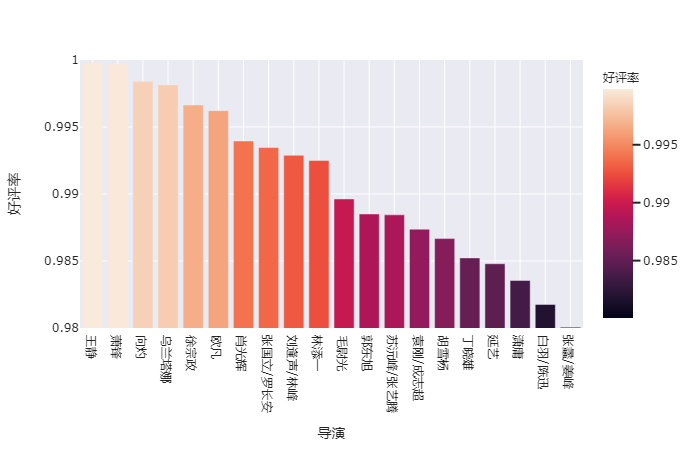

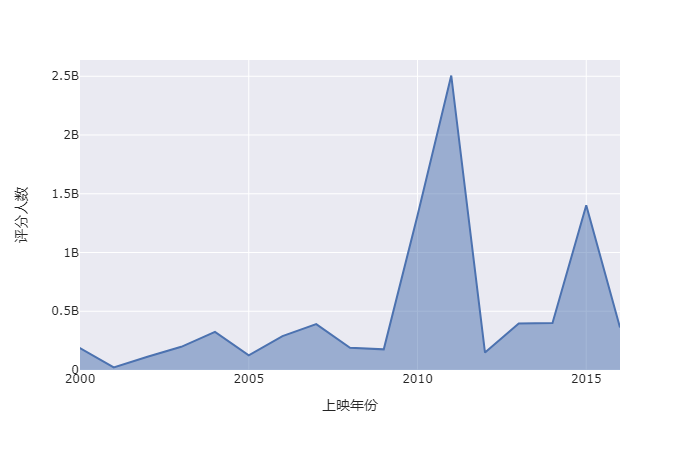

              上映年份          评分人数           好评数
count  2144.000000  2.144000e+03  2.144000e+03
mean   2008.604944  4.048769e+06  3.676173e+06
std       5.975154  3.627927e+07  3.457287e+07
min    1937.000000  0.000000e+00  0.000000e+00
25%    2005.000000  3.010700e+04  1.963675e+04
50%    2009.000000  1.440910e+05  9.692500e+04
75%    2014.000000  8.506070e+05  6.988578e+05
max    2016.000000  1.014866e+09  1.014811e+09


In [71]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
% matplotlib inline

aqy = pd.read_csv(r'D:\BaiduNetdiskDownload\项目04视频网站数据清洗整理和结论研究\爱奇艺视频数据.csv',engine='python')

for col in aqy.columns:
    if aqy[col].dtype=='object':
        aqy[col].fillna('缺失数据',inplace=True)
    else: aqy[col].fillna(0,inplace=True)

aqy['数据获取日期']=pd.to_datetime(aqy['数据获取日期'],format='%Y年%m月%d日')

data=aqy.groupby('导演').sum()[['评分人数','好评数']]
data['好评率']=data['好评数']/data['评分人数']
data.sort_values('好评率',ascending=False,inplace=True)
data_1=data.iloc[:20].reset_index()
fig=px.bar(data_1,x='导演',y='好评率',color='好评率',template='seaborn')
fig.update_yaxes(range=[0.98,1])
fig.show(renderer='png')

data_2=aqy[['上映年份','导演','整理后剧名']].drop_duplicates()
data_3=data_2[data_2['上映年份']!=0]
data_4=aqy.groupby('整理后剧名').sum()[['评分人数','好评数']]
data_5=pd.merge(data_3,data_4,left_on='整理后剧名',right_index=True,how='left')
data_5.head()
data_6=data_5.groupby('上映年份').sum()[['评分人数','好评数']]
data_6.reset_index(inplace=True)
pig=px.area(data_6,x='上映年份',y='评分人数',template='seaborn')
pig.update_xaxes(range=[2000,2016])
pio.orca.config.executable = r'C:\Users\徐钦华\AppData\Local\Programs\orca\orca.exe'
pig.show(renderer='png')

s=data_5.describe()
print(s)